In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numba import njit

In [2]:
no_of_points = 5 * 10 ** 8

In [3]:
@njit

def checkDivergence(z):

    #Julia set sequence
    def functionOfz(z, b):
        return ((z ** 2 + 1)/(2 * z)) ** b
    
    z_array = np.zeros(30, dtype=np.complex128) #this array is just the sequence defined by the function above
    z_array[0] = z #initial value which is a random complex number
    
    for i in range(1, len(z_array)):
        z_array[i] = functionOfz(z_array[i-1], 2) #recursively calculating the sequence
        if np.isnan(z_array[i]): #checking for divergence. If there is then the loop breaks 
            break
    
    #checking for divergence in the sequence
    for j in range(len(z_array)):
        if np.isnan(z_array[j]):
            return 0,0

    epsilon = 10E-50 #a tolerance value since we cannot have exact floating point values
    if abs(z_array[-1].real - 1) < epsilon or abs(z_array[-1].imag - 1) < epsilon: #checking what points converge to the fixed point
        return 1, z
    else:
        return 2, z #all other points that do not converge to the fixed points

In [4]:
#generate random numbers using numba
@njit

def generateRandom():
    random.seed(0)
    random_array = np.zeros(no_of_points, dtype = np.complex128)

    x, y = 0, 0
    for i in range(no_of_points):
        x = random.uniform(-4, 4)
        y = random.uniform(-8, 8)
        random_array[i] = complex(x, y)

    return random_array

In [5]:
#use numba to check for divergence
@njit 

def generateFinal(random_arr):

    check_list = [] #list of values that do not converge to the fixed points
    check_list_flow = [] #list of values that do converge to the fixed points

    for i in range(0, no_of_points):
        check_num, z = checkDivergence(random_arr[i])
        if check_num == 1 and check_num != 0:
            check_list.append(random_arr[i]) #all the values that converge to the fixed points
        if check_num == 2 and check_num != 0:
            check_list_flow.append(random_arr[i]) #all the values that do not converge to the fixed points

    #check_array = np.array(check_list)
    check_array_flow = np.array(check_list_flow)

    return check_list, check_array_flow

In [6]:
random_array = generateRandom()

In [7]:
converging, diverging = generateFinal(random_array)

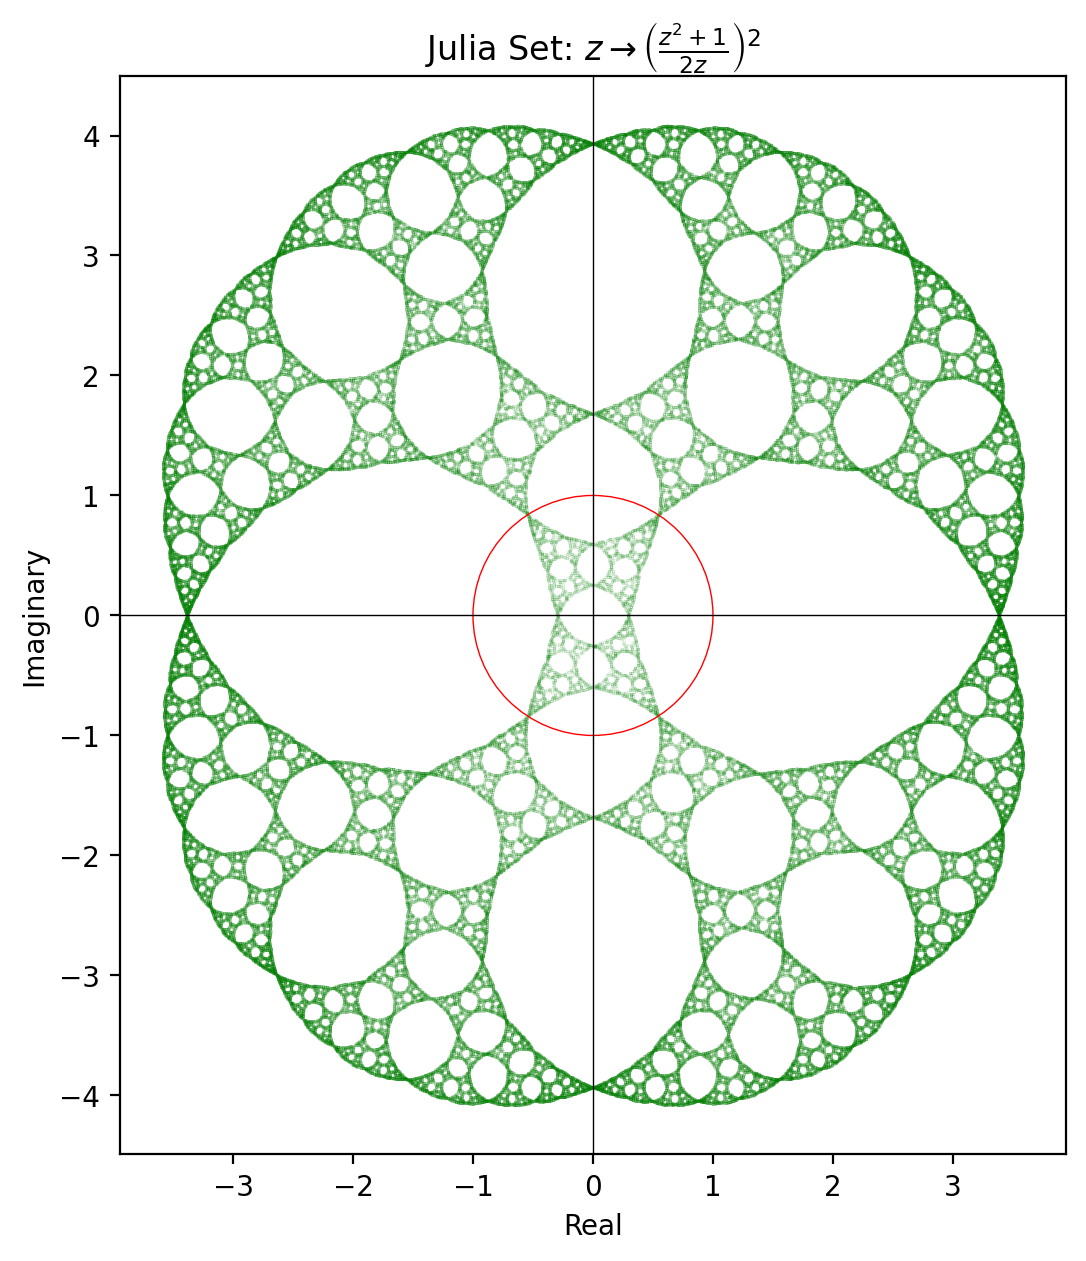

In [8]:
plt.figure(figsize=(7, 7), dpi=200)
#plt.scatter(check_array.real, check_array.imag, s=0.000001, label = 'kuch bhi')
plt.scatter(diverging.real, diverging.imag, s = 0.0005, label = 'fixed points', color = 'green')
plt.gca().set_aspect('equal')
circle1 = plt.Circle((0, 0), 1, color='r', fill=False, lw=0.5)

plt.gca().add_patch(circle1)
plt.axvline(0, color='k', lw = 0.5)
plt.axhline(0, color='k', lw = 0.5)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title(r"Julia Set: $z\rightarrow\left(\frac{z^2 + 1}{2z}\right)^2$")
plt.show()